<a href="https://colab.research.google.com/github/SidSolanki28/Credit-Card-Customer-Segmentation/blob/master/credit_card_autoencoder_model_builiding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [61]:
import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis

import seaborn as sns				# Statistical data visualization
import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

In [62]:
# To display all rows and columns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [63]:
### Importing content from drive ###

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset

In [64]:
df = pd.read_csv("/content/drive/My Drive/Project/Credit Card || Clustering || Kmeans/credit_card_pre_processed.csv")

# Data Inspection

## Shape

In [65]:
df.shape

(8950, 17)

## Dataset

In [66]:
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


# Feature Engineering

## Define X&Y

In [67]:
X = df.iloc[:, :].values

In [68]:
X

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, ...,
        1.39509787e+02, 0.00000000e+00, 1.20000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00, ...,
        1.07234022e+03, 2.22222000e-01, 1.20000000e+01],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02, ...,
        6.27284787e+02, 0.00000000e+00, 1.20000000e+01],
       ...,
       [2.33986730e+01, 8.33333000e-01, 1.44400000e+02, ...,
        8.24183690e+01, 2.50000000e-01, 6.00000000e+00],
       [1.34575640e+01, 8.33333000e-01, 0.00000000e+00, ...,
        5.57556280e+01, 2.50000000e-01, 6.00000000e+00],
       [3.72708075e+02, 6.66667000e-01, 1.09325000e+03, ...,
        8.82889560e+01, 0.00000000e+00, 6.00000000e+00]])

# Feature Scaling

## Standarsization

In [69]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

In [70]:
X.shape

(8950, 17)

In [71]:
X

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

# Dimensionality Reduction

## Auto encoders

In [72]:
from tensorflow.keras.layers import Input, Add, Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Model, load_model

from keras.optimizers import SGD

In [73]:
### Define the encoder dimension
encoding_dim = 10

In [74]:
ncols = 17

# Define input layer
input_dim = Input(shape = (ncols,))

In [75]:
# Encoder Layers

x = Dense(2048, activation = 'relu')(input_dim)
x = Dense(1024, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
#x = Dense(512, activation = 'relu')(x)
encoded = Dense(encoding_dim, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

In [76]:
# Decoder Layers

#x = Dense(512, activation = 'relu')(x)
x = Dense(1024, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2048, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(ncols, kernel_initializer = 'glorot_uniform')(x)

In [77]:
## autoencoder
autoencoder = Model(inputs = input_dim, outputs = decoded)

# Compile the Model
autoencoder.compile(optimizer= 'SGD', loss='mean_squared_error')

autoencoder.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 2048)              36864     
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_16 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_17 (Dense)             (None, 17)                34833     
Total params: 5,318,673
Trainable params: 5,318,673
Non-trainable params: 0
____________________________________________

In [78]:
# Train Auto Encoder

history = autoencoder.fit(X, X, 
                epochs = 50, 
                batch_size = 32,
                shuffle = False,
                verbose = 1)

Epoch 1/50
280/280 [==============================] - 1s 5ms/step - loss: 0.7416
Epoch 2/50
280/280 [==============================] - 1s 5ms/step - loss: 0.3575
Epoch 3/50
280/280 [==============================] - 1s 5ms/step - loss: 0.1850
Epoch 4/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0945
Epoch 5/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0577
Epoch 6/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0408
Epoch 7/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0308
Epoch 8/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0238
Epoch 9/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0186
Epoch 10/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0148
Epoch 11/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0120
Epoch 12/50
280/280 [==============================] - 1s 5ms/step - loss: 0.0099
Epoch 13/50
280/280 [====

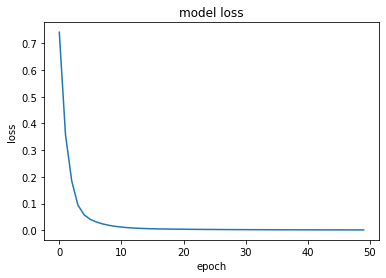

In [79]:
# loss

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [80]:
# save weights

autoencoder.save_weights('./autoencoder.h5')

In [81]:
#encoder - used for our dimention reduction

encoder = Model(input_dim, encoded)

In [82]:
pred_X = encoder.predict(X)

In [83]:
pred_X.shape

(8950, 10)

In [84]:
pred_X

array([[0.        , 0.        , 0.20381019, ..., 0.0129357 , 0.02979336,
        0.12618837],
       [0.        , 0.        , 0.08000264, ..., 0.        , 0.08483358,
        0.3458639 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06511271,
        0.16538033],
       ...,
       [0.        , 0.33772573, 0.51187414, ..., 0.11819355, 0.39598417,
        0.30521825],
       [0.        , 0.17268145, 0.55651057, ..., 0.20334472, 0.33724657,
        0.30571622],
       [0.        , 0.29437503, 0.328528  , ..., 0.04526578, 0.38750327,
        0.2758444 ]], dtype=float32)

# Optimal No. of Clusters

## The Elbow Method

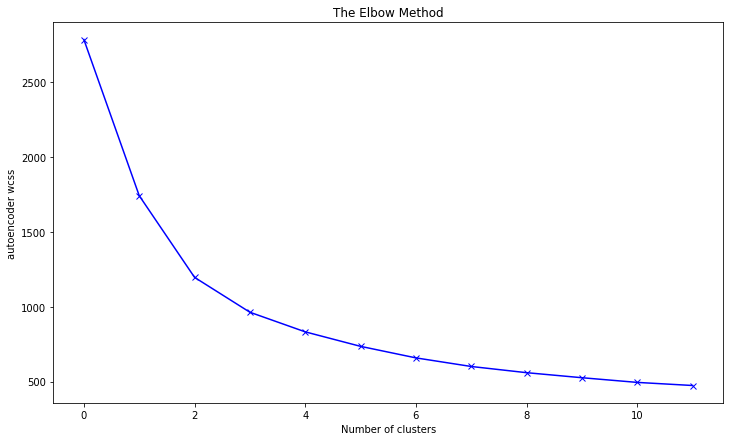

In [85]:
plt.figure(figsize=(12,7))

from sklearn.cluster import KMeans
autoencoder_wcss = []
kmax = 12
for i in range(1, kmax+1):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pred_X)
    autoencoder_wcss.append(kmeans.inertia_)
#plt.plot(range(1, 20), autoencoder_wcss)
plt.plot(autoencoder_wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('autoencoder wcss')
plt.show()

## The Silhouette Method

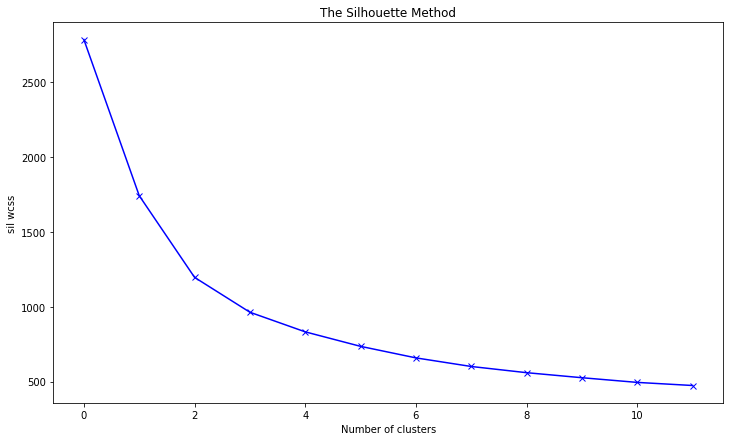

In [86]:
plt.figure(figsize=(12,7))

from sklearn.metrics import silhouette_score
sil = []
kmax = 12

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for i in range(2, kmax+1):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(pred_X)
  sil.append(silhouette_score(pred_X, kmeans.labels_, metric = 'euclidean'))
#plt.plot(range(1, 20), autoencoder_wcss)
plt.plot(autoencoder_wcss, 'bx-')
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('sil wcss')
plt.show()

As per Silhouette method, no. of clusters should be least as possible, because value of intra-cluster distance is decreasing with increase in clusters.

As per elbow method, choosing k = 4 is good

# Model Training

## K means

In [87]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(pred_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [88]:
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [89]:
labels.shape, cluster_centers.shape

((8950,), (4, 10))

In [90]:
y_kmeans = kmeans.fit_predict(pred_X)
y_kmeans

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [91]:
cluster_name = pd.DataFrame({'CLUSTER': labels})

In [92]:
df1 = pd.concat( [df, cluster_name], axis =1 )

In [93]:
df1.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


# Model Visualization

In [96]:
total_clusters = len(df1['CLUSTER'].unique())
total_clusters

4

## Cluster Analysis

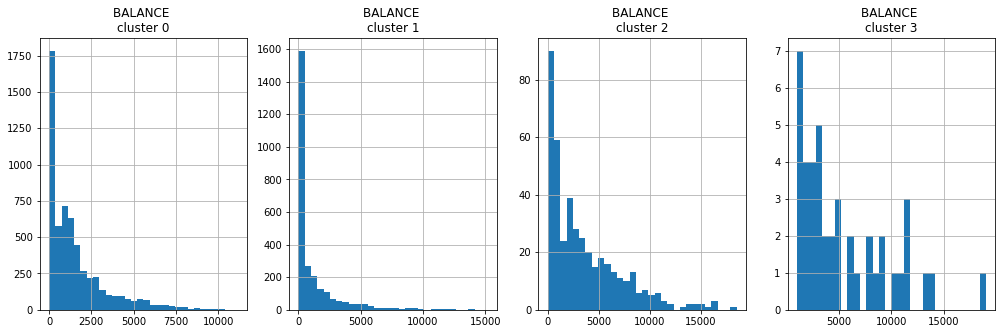

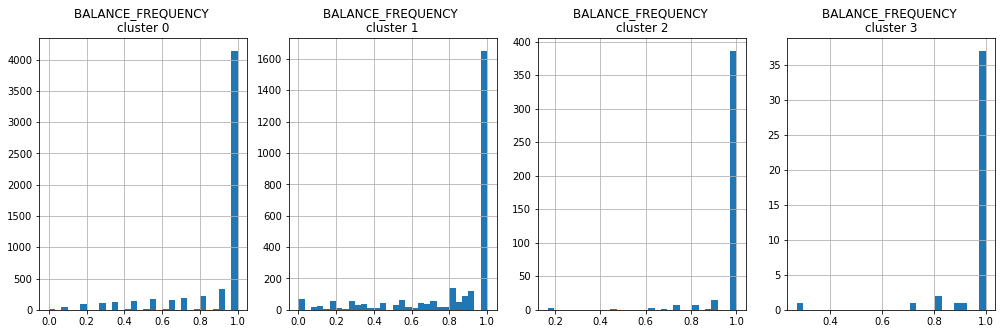

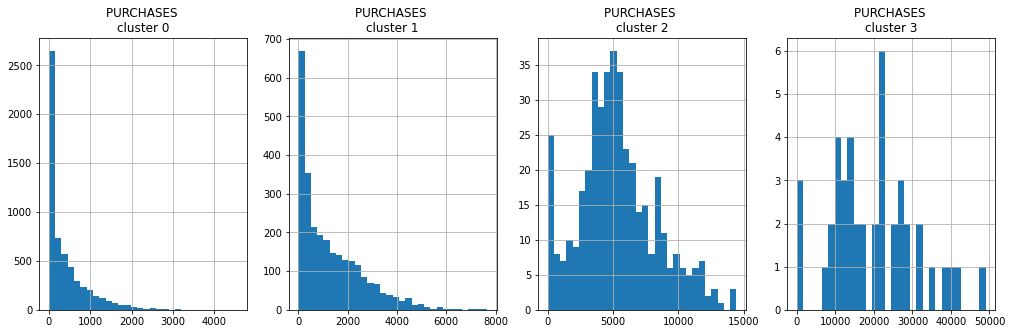

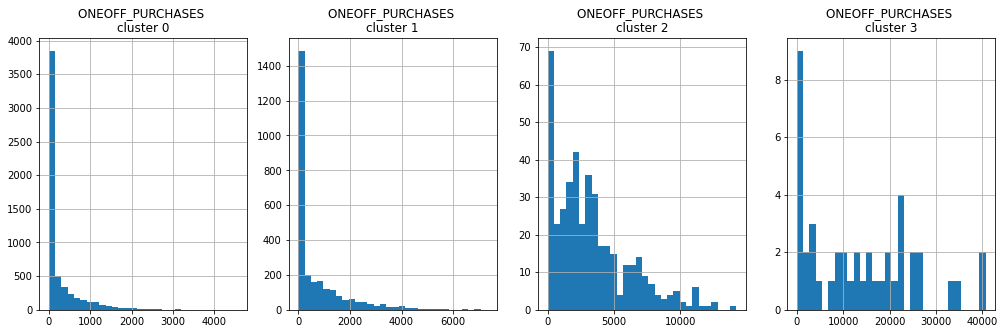

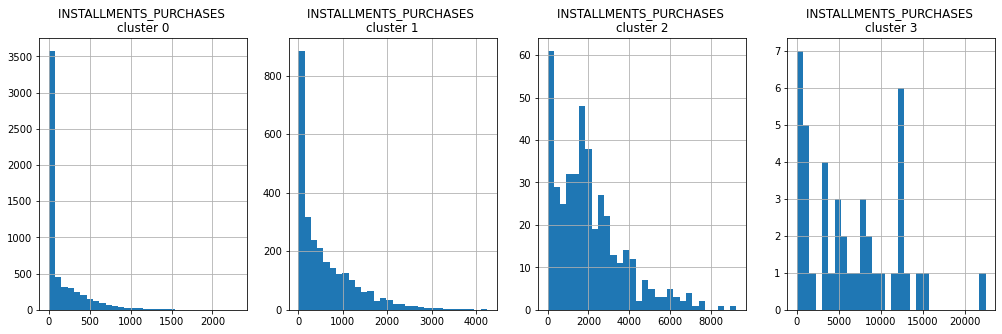

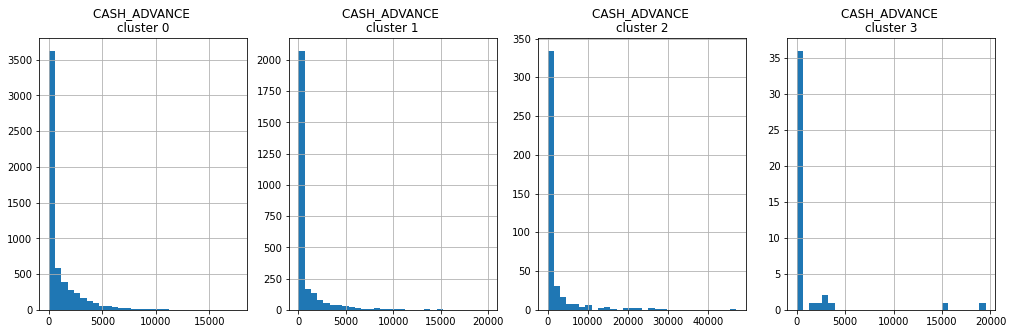

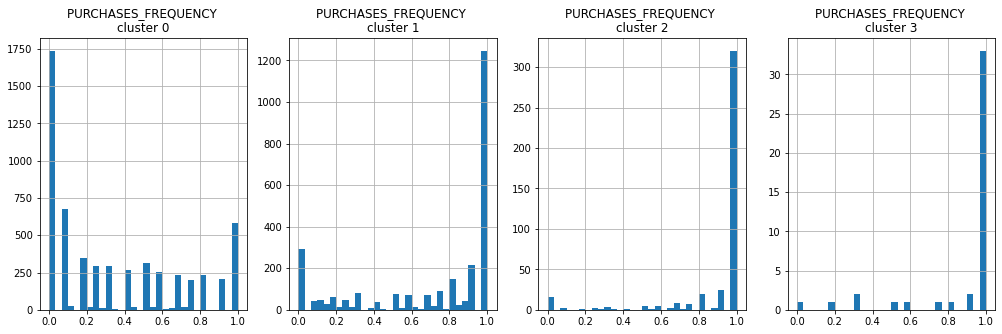

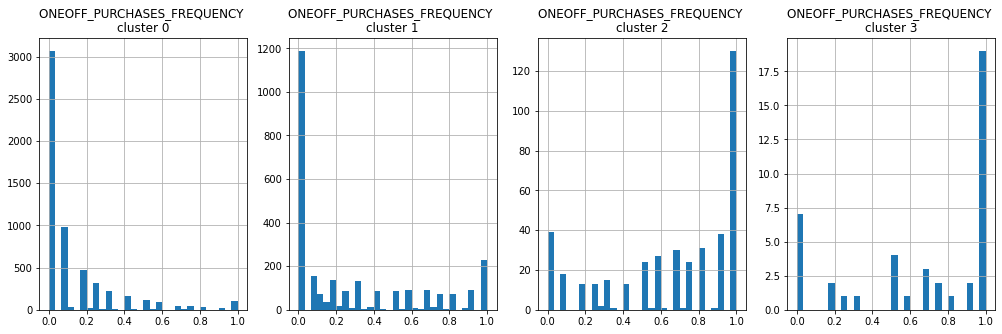

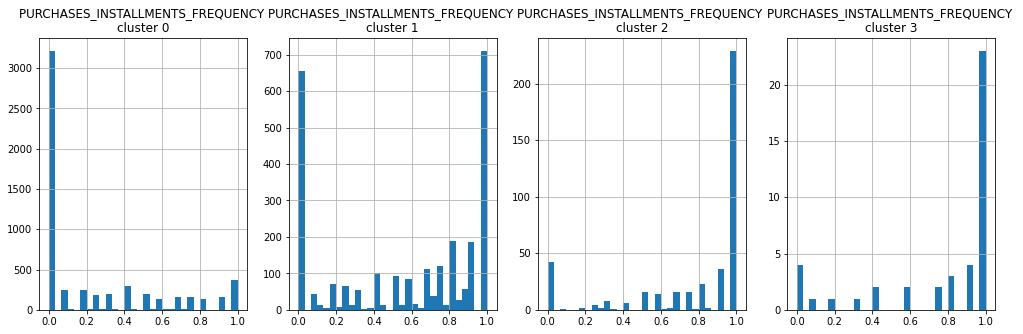

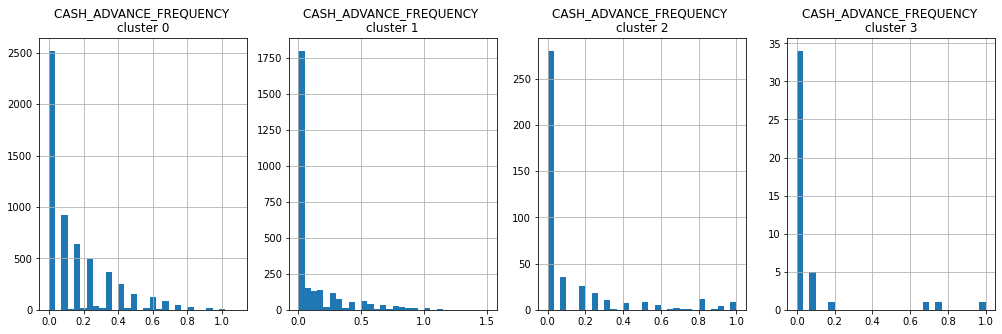

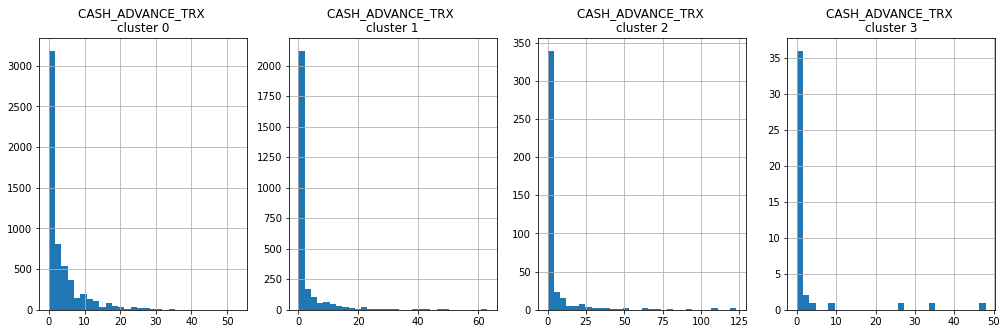

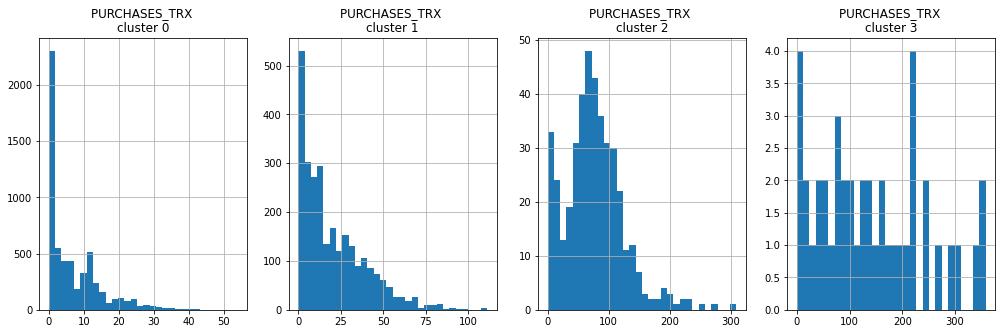

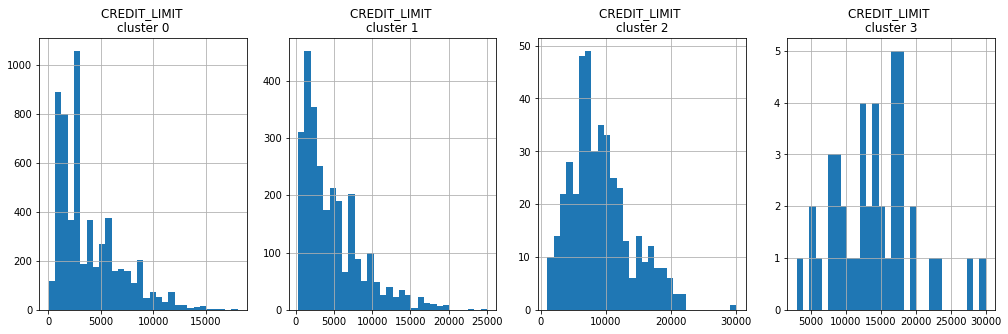

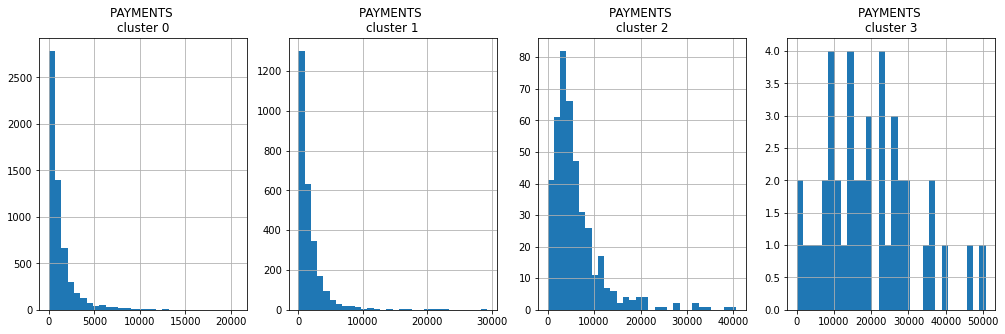

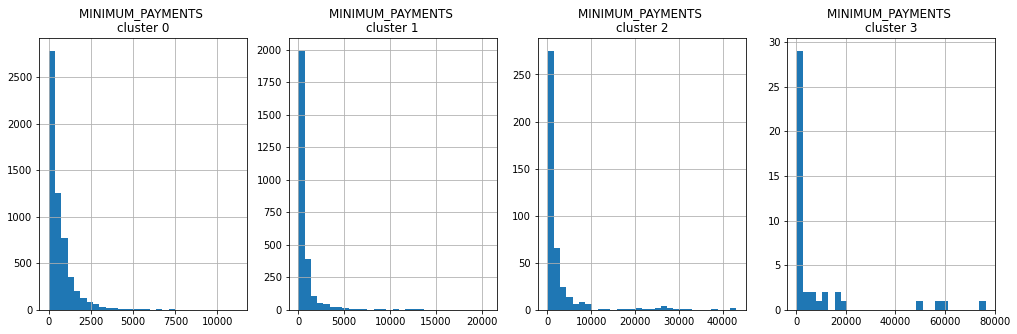

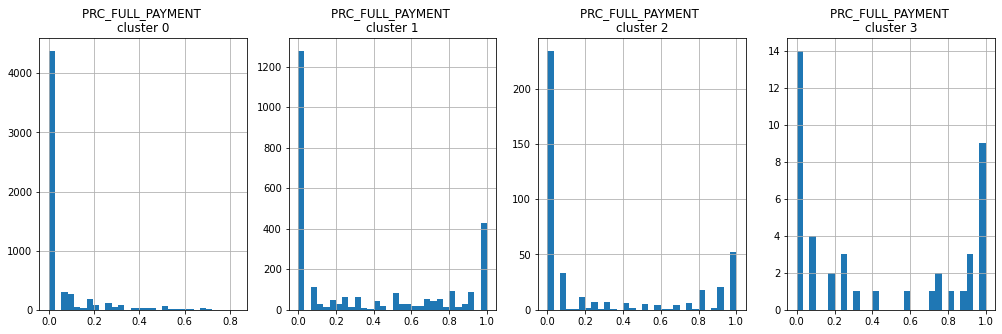

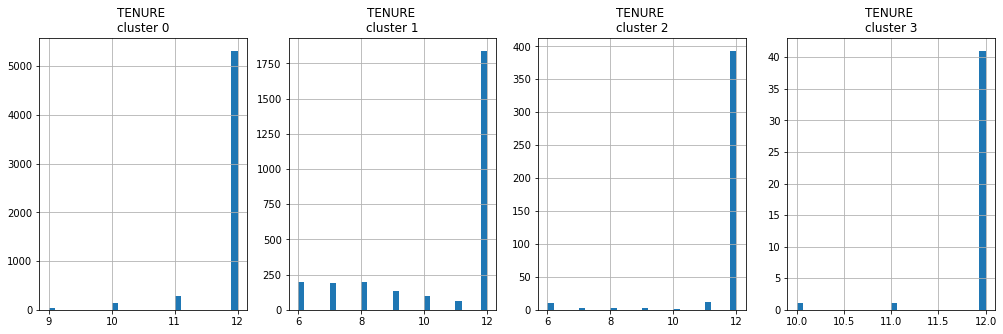

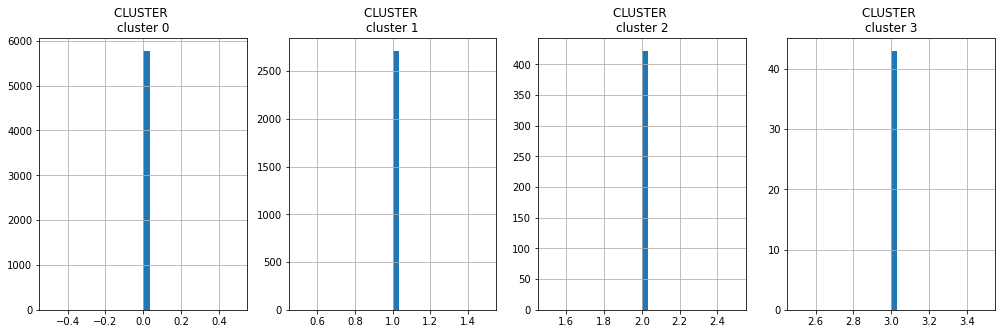

In [97]:
for i in df1.columns:
    plt.figure(figsize=(35,5))
    for j in range(total_clusters):
        plt.subplot(1,8,j+1)
        cluster_df = df1[df1['CLUSTER'] == j]
        cluster_df[i].hist( bins = 30)
        plt.title(f'{i} \ncluster {j}')
    plt.show()

## PCA

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state=42)
pca_auto = pca.fit_transform(pred_X)

In [99]:
pca_auto.shape

(8950, 2)

In [100]:
pca_auto = pd.DataFrame(pca_auto, columns = ['PC1', 'PC2'])

In [ ]:
pca_auto

In [101]:
df2 = pd.concat([pca_auto, cluster_name], axis = 1)
df2

,PC1,PC2,CLUSTER
0,-0.349061,-0.026531,0
1,-0.276812,0.215861,0
2,-0.101410,0.014369,0
3,-0.290364,0.047722,0
4,-0.367064,-0.039345,0
5,-0.155509,-0.080690,0
6,1.169232,0.000805,2
7,-0.124890,-0.062992,0
8,-0.371761,0.021947,0
9,-0.221182,0.081779,0


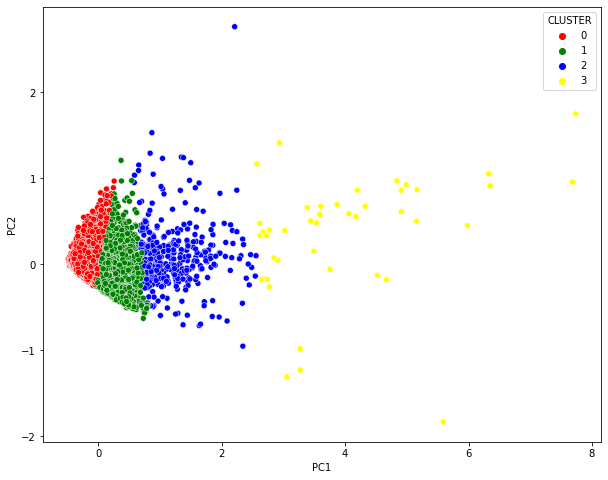

In [104]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df2, x="PC1", y="PC2", hue = 'CLUSTER', palette =['red','green','blue','yellow'])
plt.show()